In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.dates as mdates

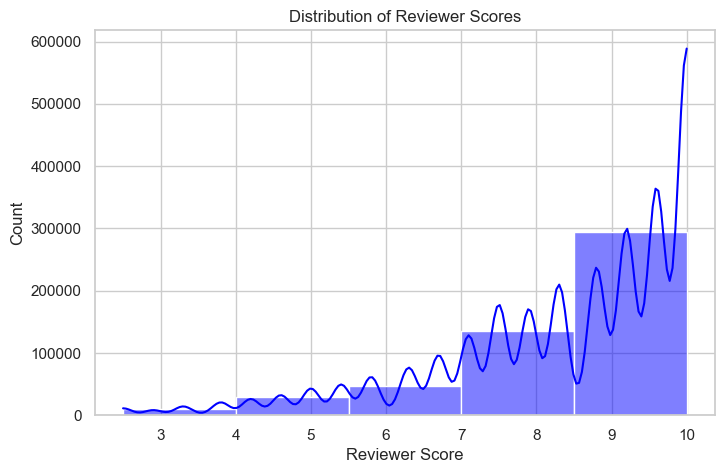

/var/folders/3b/s4l_xdvn24n5tmx_dh94ql1w0000gn/T/ipykernel_98070/2051355819.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Reviewer_Nationality"], order=df["Reviewer_Nationality"].value_counts().index, palette="coolwarm")


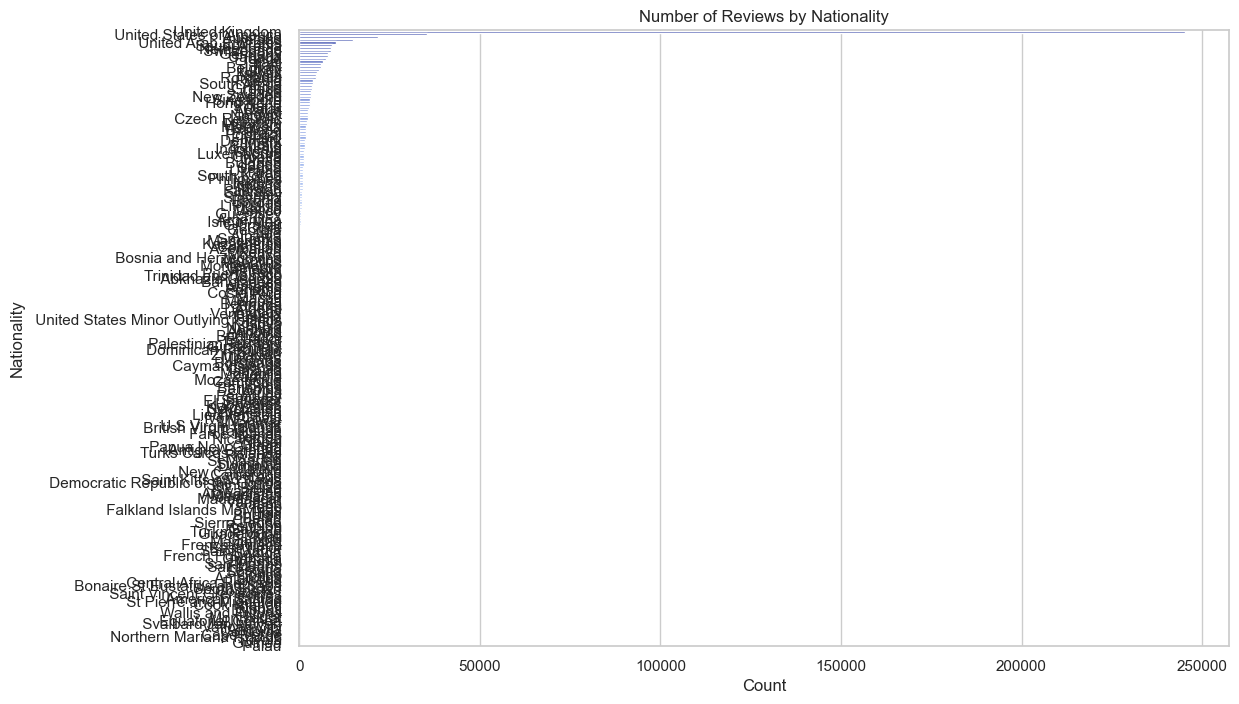

In [2]:
df = pd.read_csv("./Hotel_Reviews.csv")

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram of Reviewer Scores
plt.figure(figsize=(8, 5))
sns.histplot(df["Reviewer_Score"], bins=5, kde=True, color="blue")
plt.title("Distribution of Reviewer Scores")
plt.xlabel("Reviewer Score")
plt.ylabel("Count")
plt.show()

# 2. Bar Chart: Total Reviews per Nationality
plt.figure(figsize=(12, 8))
sns.countplot(y=df["Reviewer_Nationality"], order=df["Reviewer_Nationality"].value_counts().index, palette="coolwarm")
plt.title("Number of Reviews by Nationality")
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.show()

# 3. Word Cloud of Positive Reviews
# positive_text = " ".join(df["Positive_Review"].astype(str))
# wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.title("Word Cloud of Positive Reviews")
# plt.show()

# # 4. Word Cloud of Negative Reviews
# negative_text = " ".join(df["Negative_Review"].astype(str))
# wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_neg, interpolation="bilinear")
# plt.axis("off")
# plt.title("Word Cloud of Negative Reviews")
# plt.show()

In [3]:
df = df.dropna()

In [4]:
# import folium
# from folium.plugins import HeatMap , MarkerCluster


# m = folium.Map(location=[df["lat"].mean(), df["lng"].mean()], zoom_start=14)

# marker_cluster = MarkerCluster().add_to(m)

# for _ , row in df.iterrows():
#     popup_text = f"""
#     <b>Hotel:</b> {row['Hotel_Name']}<br>
#     <b>Reviewer Nationality:</b> {row['Reviewer_Nationality']}<br>
#     <b>Review Score:</b> {row['Reviewer_Score']}<br>
#     <b>Positive:</b> {row['Positive_Review']}<br>
#     <b>Negative:</b> {row['Negative_Review']}
#     """
#     folium.Marker(
#         location=[row["lat"], row["lng"]],
#         popup=folium.Popup(popup_text, max_width=300),
#         icon=folium.Icon(color="green" if row["Reviewer_Score"] > 5 else "red")
#     ).add_to(marker_cluster)

In [5]:
# from IPython.display import display
# display(m)

In [6]:
# m.save("index..html")

/var/folders/3b/s4l_xdvn24n5tmx_dh94ql1w0000gn/T/ipykernel_98070/611966753.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="Reds_r")


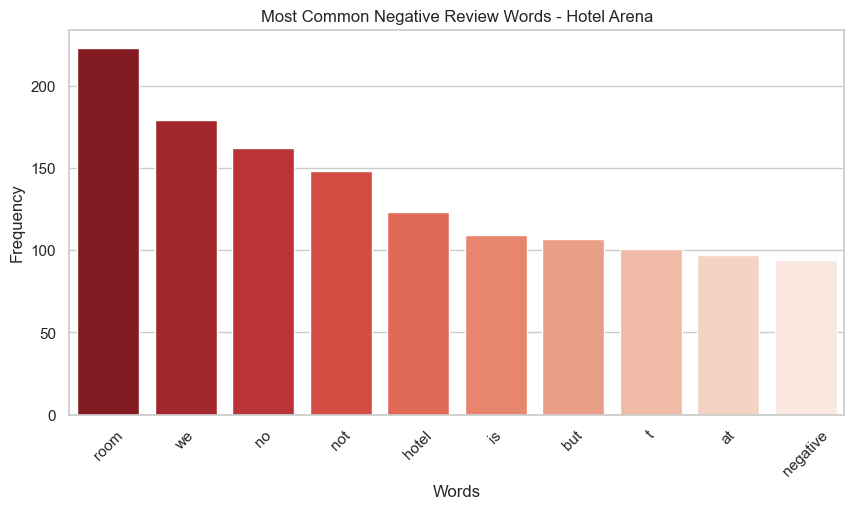

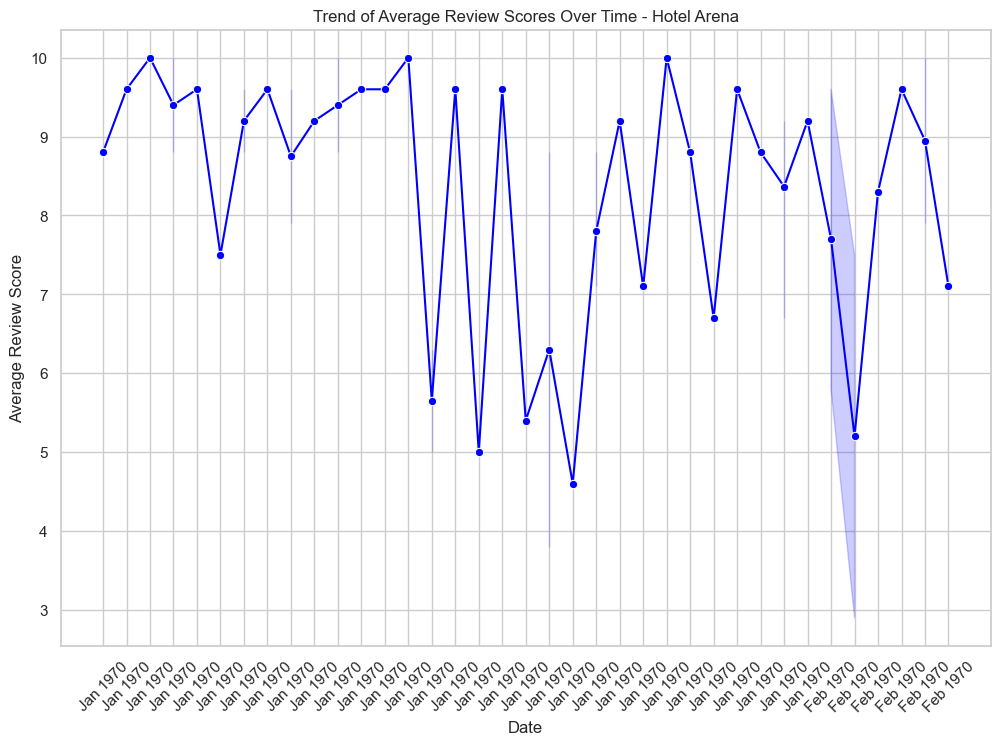

In [11]:
# Hardcoded hotel selection
selected_hotel = "Hotel Arena"
filtered_df = df[df["Hotel_Name"] == selected_hotel].sort_values("Review_Date" , ascending=False)

# --- 1. Bar Chart: Common Complaints ---
stopwords = set(["the", "a", "and", "to", "i", "of", "was", "it", "on", "in", "my", "for", "that", "this", "had"])
negative_words = " ".join(filtered_df["Negative_Review"].astype(str)).lower().split()
filtered_words = [word for word in negative_words if word not in stopwords]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="Reds_r")
plt.title(f"Most Common Negative Review Words - {selected_hotel}")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# --- 2. Time-Series Analysis of Review Scores ---
plt.figure(figsize=(12, 8))
sns.lineplot(x=filtered_df["Review_Date"][:50], y=filtered_df["Reviewer_Score"][:50], marker="o", color="blue")
plt.title(f"Trend of Average Review Scores Over Time - {selected_hotel}")
plt.xlabel("Date")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True)
plt.show()

In [12]:
df['Tags']

0         [' Leisure trip ', ' Couple ', ' Duplex Double...
1         [' Leisure trip ', ' Couple ', ' Duplex Double...
2         [' Leisure trip ', ' Family with young childre...
3         [' Leisure trip ', ' Solo traveler ', ' Duplex...
4         [' Leisure trip ', ' Couple ', ' Suite ', ' St...
                                ...                        
515733    [' Leisure trip ', ' Family with older childre...
515734    [' Leisure trip ', ' Family with young childre...
515735    [' Leisure trip ', ' Family with older childre...
515736    [' Leisure trip ', ' Group ', ' Standard Tripl...
515737    [' Leisure trip ', ' Family with young childre...
Name: Tags, Length: 512470, dtype: object